In [118]:
import pandas as pd

data = pd.read_csv('./Dataset1/football_data.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Unnamed: 60
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,NaN
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,NaN
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,NaN
3,3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,NaN
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,NaN


In [119]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause',
       'Unnamed: 60'],
      dtype='object')

In [120]:
data.drop(columns=['Unnamed: 0', 'ID', 'Name', 'Loaned From', 'Unnamed: 60'], inplace=True)

In [121]:
data['Contract Valid Until'] = [x[-4: ] if len(str(x)) > 4 else x for x in data['Contract Valid Until']]

In [122]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['Nationality'] = encoder.fit_transform(data['Nationality'])
data['Club'] = encoder.fit_transform(data['Club'])
data['Value'] = encoder.fit_transform(data['Value'])
data['Wage'] = encoder.fit_transform(data['Wage'])
data['Preferred Foot'] = encoder.fit_transform(data['Preferred Foot'])
data['Work Rate'] = encoder.fit_transform(data['Work Rate'])
data['Body Type'] = encoder.fit_transform(data['Body Type'])
data['Position'] = encoder.fit_transform(data['Position'])
data['Real Face'] = encoder.fit_transform(data['Real Face'])
data['Joined'] = encoder.fit_transform(data['Joined'])
data['Weight'] = encoder.fit_transform(data['Weight'])
data['Height'] = encoder.fit_transform(data['Height'])
data['Release Clause'] = encoder.fit_transform(data['Release Clause'])


In [123]:
for index, row in data.iterrows():
    try:
        data.loc[index] = row.astype('float')
    except ValueError as e:
        data = data.drop(index, axis=0)

data = data.reset_index(drop=True)

In [143]:
data = data.fillna(data.mean())


In [144]:
import numpy as np
import random
from collections import Counter

def EucledianDistance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def isSimilar(a, b):
    if len(a) != len(b):
        return False

    flag = True
    for i in range(len(a)):
        if a[i] != b[i]:
            flag = False
            break
    return flag

class KMeans:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X):
        self.X = X
        self.centroids = []
        self.clusters = [-1 for _ in range(len(self.X))]
        # randomly choose k tuples from the dataframe X
        for i in range(self.k):
            self.centroids.append(self.X.iloc[random.randint(0, len(self.X))])

        while True:
            newClusters = []
            self.wcss = 0
            for idx, x in X.iterrows():
                distances = [EucledianDistance(x, centroid) for centroid in self.centroids]
                newClusters.append(np.argmin(distances))
                self.wcss += np.min(distances)

            if (isSimilar(newClusters, self.clusters)):
                break
            else:
                self.clusters = newClusters

    def get_wcss(self):
        return self.wcss

    def get_labels(self):
        return self.clusters

    def predict(self, x):
        distances = [EucledianDistance(x, centroid) for centroid in self.centroids]
        return np.argmin(distances)


progress: 33.333333333333336%
progress: 66.66666666666667%
progress: 100.0%


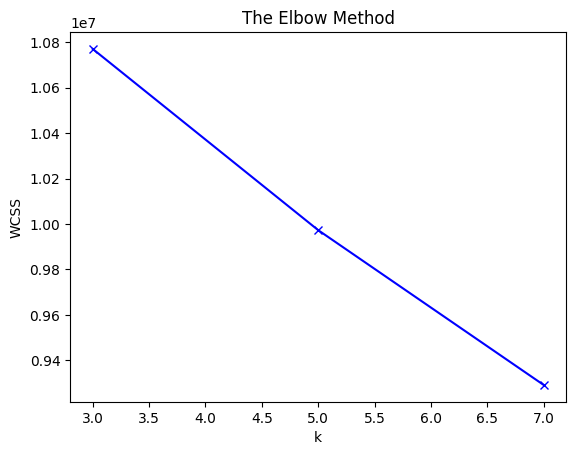

In [140]:
k_values = [3, 5, 7]
wcss = []
for idx, k in enumerate(k_values):
    kmeans = KMeans(k)
    kmeans.fit(data)
    wcss.append(kmeans.get_wcss())
    print(f'progress: {(idx+1)*100/len(k_values)}%')

# Plot the elbow graph
import matplotlib.pyplot as plt
plt.plot(k_values, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()


## From the Elbow method we can see that the optimal number of clusters is 5

In [ ]:
from sklearn.metrics import silhouette_score
scores = []

for idx, k in enumerate(k_values):
    kmeans = KMeans(k)
    kmeans.fit(data)
    scores.append(silhouette_score(data, kmeans.get_labels()))
    print(f'progress: {(idx+1)*100/len(k_values)}%')


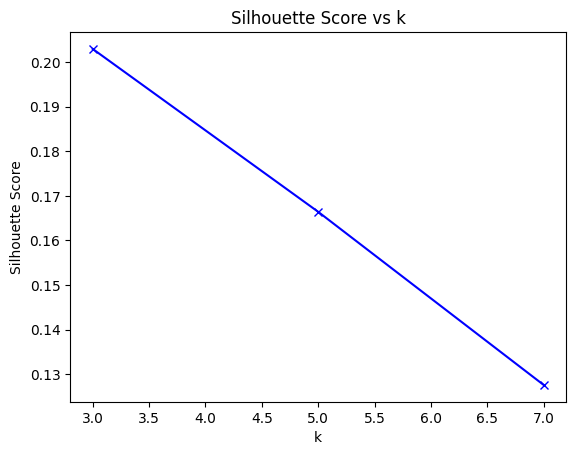

In [147]:
# plot the scores vs k
plt.plot(k_values, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()

## Silhouette score is maximum for k = 3, so optimal number of clusters is 3